In [1]:
from data_load import *
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler

In [7]:
import pandas as pd
df = pd.read_csv('data/training.csv')
df.shape

(7049, 31)

In [30]:
mean = df.iloc[:,:30].stack().mean()
std = df.iloc[:,:30].stack().std()
mean, std

(49.07004913766131, 17.925252239001917)

In [36]:
kp = (df.iloc[:,:30].stack() - mean) / (std)
kp.min(), kp.max(), kp.mean(), kp.shape

(-2.6991785941169724, 2.6145013013969276, 3.387345531138345e-14, (106058,))

In [28]:
kp = df.iloc[:,:30].stack()
kpn = -1 + 2.*(kp - kp.min())/(kp.max() - kp.min())
kpn.min(), kpn.max(), kpn.mean(), kpn.shape

(-1.0, 1.0, 0.015935715809979704, (106058,))

(array([ 2.,  3.,  3.,  3.,  4.,  3.,  7.,  5., 12., 14., 11., 37., 56.,
        33., 38., 58., 74., 65., 33., 19.,  8., 19., 43., 41., 24., 10.,
        12., 18., 16., 15., 18., 12., 27., 38., 30., 16., 17., 20., 27.,
        21., 23., 16., 20.,  8.,  9.,  5.,  1.,  3.,  2.,  1.]),
 array([-0.81659558, -0.78140298, -0.74621038, -0.71101779, -0.67582519,
        -0.64063259, -0.60544   , -0.5702474 , -0.5350548 , -0.49986221,
        -0.46466961, -0.42947701, -0.39428442, -0.35909182, -0.32389922,
        -0.28870663, -0.25351403, -0.21832143, -0.18312884, -0.14793624,
        -0.11274364, -0.07755104, -0.04235845, -0.00716585,  0.02802675,
         0.06321934,  0.09841194,  0.13360454,  0.16879713,  0.20398973,
         0.23918233,  0.27437492,  0.30956752,  0.34476012,  0.37995271,
         0.41514531,  0.45033791,  0.48553051,  0.5207231 ,  0.5559157 ,
         0.5911083 ,  0.62630089,  0.66149349,  0.69668609,  0.73187868,
         0.76707128,  0.80226388,  0.83745647,  0.87264907,

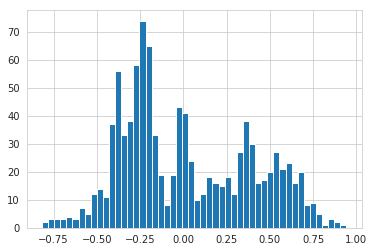

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.hist(kpn.sample(1000), bins=50)

(array([ 1.,  0.,  3.,  4.,  4.,  5.,  3.,  6.,  9., 14., 10., 11., 32.,
        32., 44., 29., 33., 72., 78., 43., 20., 19., 18., 26., 36., 29.,
        29., 12., 18., 21., 16., 22., 14., 18., 21., 32., 27., 23., 21.,
        20., 21., 17., 15., 19., 24., 12.,  7.,  4.,  4.,  2.]),
 array([ 8.08371429,  9.70664   , 11.32956571, 12.95249143, 14.57541714,
        16.19834286, 17.82126857, 19.44419429, 21.06712   , 22.69004571,
        24.31297143, 25.93589714, 27.55882286, 29.18174857, 30.80467429,
        32.4276    , 34.05052571, 35.67345143, 37.29637714, 38.91930286,
        40.54222857, 42.16515429, 43.78808   , 45.41100571, 47.03393143,
        48.65685714, 50.27978286, 51.90270857, 53.52563429, 55.14856   ,
        56.77148571, 58.39441143, 60.01733714, 61.64026286, 63.26318857,
        64.88611429, 66.50904   , 68.13196571, 69.75489143, 71.37781714,
        73.00074286, 74.62366857, 76.24659429, 77.86952   , 79.49244571,
        81.11537143, 82.73829714, 84.36122286, 85.98414857,

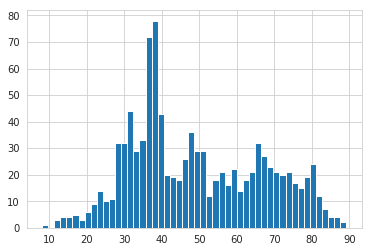

In [24]:
plt.hist(kp.sample(1000), bins=50)

In [2]:
def get_dataset_indices(file, n_keypoints):
    df = pd.read_csv(file)
    notnan = df.apply(lambda x: np.sum(~x[:30].isnull()), axis=1)
    return notnan[notnan == n_keypoints*2].index

In [3]:
dataset = FacialKeyPoints(csv_file='data/training.csv',
                              n_keypoints=4,
                              size=(96,96))

In [4]:
indices = get_dataset_indices(file='data/training.csv', n_keypoints=4)
train_idx, val_idx = train_test_split(indices, test_size=0.15,
                                      shuffle=True, random_state=0)
train_sampler = SubsetRandomSampler(train_idx)
train_loader = DataLoader(dataset,
                      sampler=train_sampler,
                      batch_size=8,
                      drop_last=True)

In [5]:
for batch_idx, sample in enumerate(train_loader):
    img = sample['image']
    kpts = sample['keypoints']
    print(img.shape, kpts.shape)

__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(

(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96)

torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96)

(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96)

(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__ge

torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96)

torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
torch.Size([8, 1, 96, 96]) torch.Size([8, 4, 2])
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96) (4, 2)
__getitem__
(96, 96)

In [3]:
import sys
for sample in dataset:
    img = sample['image']
    kpts = sample['keypoints']
    print(img.shape, kpts.shape)
    sys.exit(0)

__getitem__
(30,)
torch.Size([1, 96, 96]) torch.Size([15, 2])


SystemExit: 0

/home/d/miniconda3/envs/nn/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
